In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [149]:
#1D FFT

def FT (a):
    z = fft(a)
    z = abs(z)
    z = z[len(z)//2:len(z)+1]
    return z

In [177]:
#2D FFT

def TFT (b) :
    z = np.fft.fft2(b)
    z = abs(z)
    z = z[1:len(z)//2+1]
    z = np.fft.fftshift(z)
    
    return z

(128, 512)


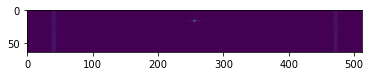

In [178]:
#Range
R = 55
#Velocity
v = 40

#Carrier Frequency
fc = 77e9

#Speed of light
c = 3e8

#Range Resolution
delta_r = 1

#Slope
B = c/(2*delta_r)

#Chirp Time
Ts = 30e-6

#Doppler FFT bins
Nd = 128

#Range FFT bins
Nr = 512

#sampling frequency
fs = 30e6

#timestamps
t = np.linspace(0, Nd*Ts, Nd*Nr )


tx_s = []
rx_s = []


for i in range (len(t)):
    
    #motion of target
    r = R + v*t[i]
    
    #time delay of target
    tau = (2*r)/c
    
    #Transmit signal
    tx = np.cos((2*np.pi*fc*t[i]) + (B*(t[i]**2)/2) )
    
    #receive signal with time delay
    rx = np.cos((2*np.pi*fc*(t[i]-tau)) + (B*(t[i]-tau)**2/2))
    
    tx_s.append(tx)
    rx_s.append(rx)
    

#mixing or dechirping the signal
mix = np.multiply(tx_s,rx_s)

#reshaping the array to 2D matrix of 128 x 256
mix = np.reshape(mix,(Nd,Nr))

print (mix.shape)

#1D FFT map
# for i in range(128):
    
#     rplot = FT(mix[i,:])
#     plt.plot(rplot)


# #range-doppler map
rdm = TFT(mix)

#plot rdm    
plt.imshow(rdm)
